Checking: /home/jovyan/data/processed_music_weather.db
Tables trouvées (4): ['processed_tracks', 'sqlite_sequence', 'etl_stats', 'soundcharts_tracks']


,table,n_rows
0,processed_tracks,50
1,sqlite_sequence,3
2,etl_stats,5
3,soundcharts_tracks,0


     id         processed_at   city country                 track_name  \
0    51  2025-11-21 09:24:40  Paris  France                  melodrama   
1    52  2025-11-21 09:24:40  Paris  France                   Berghain   
2    53  2025-11-21 09:24:40  Paris  France            FASHION DESIGNA   
3    54  2025-11-21 09:24:40  Paris  France                  ZOU BISOU   
4    55  2025-11-21 09:24:40  Paris  France              Soleil levant   
5    56  2025-11-21 09:24:40  Paris  France        The Fate of Ophelia   
6    57  2025-11-21 09:24:40  Paris  France                   Reliquia   
7    58  2025-11-21 09:24:40  Paris  France  Sexo, Violencia y Llantas   
8    59  2025-11-21 09:24:40  Paris  France                   Divinize   
9    60  2025-11-21 09:24:40  Paris  France   ILS ME RIENT TOUS AU NEZ   
10   61  2025-11-21 13:50:50  Paris  France                  melodrama   
11   62  2025-11-21 13:50:50  Paris  France                   Berghain   
12   63  2025-11-21 13:50:50  Paris  F

/tmp/ipykernel_6310/3959985054.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="n_rows", y="table", data=df_counts.sort_values("n_rows", ascending=False), palette="viridis")


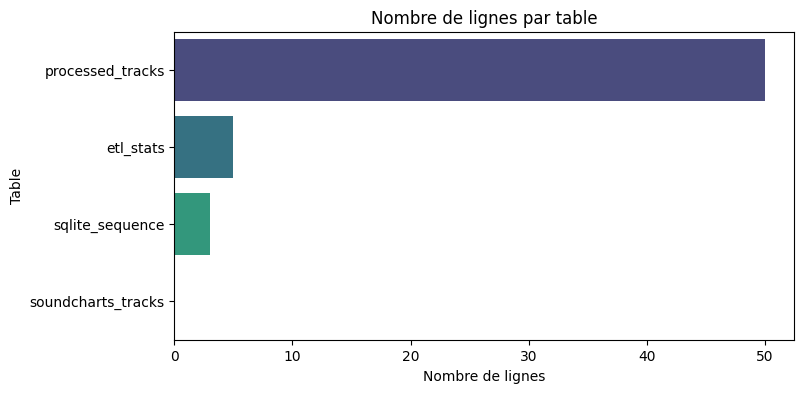


Nombre de valeurs manquantes par colonne:


id                     0
processed_at           0
city                   0
country                0
track_name             0
artist_name            0
listeners              0
playcount              0
rank_position          0
weather_condition      0
weather_description    0
temperature            0
humidity               0
wind_speed             0
mood_category          0
popularity_score       0
raw_data_path          0
dtype: int64

In [1]:
# notebooks/data_quality.ipynb
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook VSCode = environnement local Windows
project_root = os.path.abspath("..")  # remonte depuis /notebooks/
local_db_path = os.path.join(project_root, "data", "processed_music_weather.db")

print("Checking:", local_db_path)
assert os.path.exists(local_db_path), "DB not found"

db_path = local_db_path

# Connexion à la base
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# 1️⃣ Liste des tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [t[0] for t in cursor.fetchall()]
print(f"Tables trouvées ({len(tables)}): {tables}")

# 2️⃣ Nombre de lignes par table
table_counts = {}
for table in tables:
    cursor.execute(f"SELECT COUNT(*) FROM {table};")
    table_counts[table] = cursor.fetchone()[0]

df_counts = pd.DataFrame(list(table_counts.items()), columns=["table", "n_rows"])
display(df_counts)

df = pd.read_sql_query("SELECT * FROM processed_tracks LIMIT 100", conn)
print(df)

# 3️⃣ Visualisation du nombre de lignes par table
plt.figure(figsize=(8,4))
sns.barplot(x="n_rows", y="table", data=df_counts.sort_values("n_rows", ascending=False), palette="viridis")
plt.title("Nombre de lignes par table")
plt.xlabel("Nombre de lignes")
plt.ylabel("Table")
plt.show()

# 4️⃣ Exemple rapide : aperçu des premières lignes d'une table
if "city_music_trends" in tables:
    df_sample = pd.read_sql_query("SELECT * FROM processed_tracks LIMIT 10", conn)
    print("\nAperçu de 'city_music_trends':")
    display(df_sample)

# 5️⃣ Analyse des valeurs manquantes par colonne
df_full = pd.read_sql_query("SELECT * FROM processed_tracks", conn)
missing_counts = df_full.isna().sum().sort_values(ascending=False)
print("\nNombre de valeurs manquantes par colonne:")
display(missing_counts)

# 6️⃣ Distribution des valeurs uniques pour les colonnes clés

# for col in ["city", "artist_name", "mood_category", "weather_main", "timestamp"]:
#     print(f"\n🔹 Distribution pour '{col}':")
#     display(df_full[col].value_counts().head(10))

conn.close()
